# Analise exploratória (EDA) do perfil dos candidatos a prefeito no Brasil entre 2012 e 2020.

Foram analisados os atributos os gênero, grau de instrução, estado civil, raça, idade, cidade nascimento x candidatura, e posteriormente a relação entre os e o resultado da eleição (eleito / não eleito).
Em complemento foi analisado se candidaturas com ou sem coligação teria diferença no resultado do pleito ; assim como reeleiçao.

In [88]:
!pip install plotly

In [90]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os


print(os.getcwd())


C:\Users\raiaa\OneDrive\ESPECIALIZAÇÃO\15 - TCC\ELEICAO\candidatos\scripts


## Carregando dataset

In [91]:
#Apenas de estiver usando o google COLAB
#from google.colab import files
#uploaded = files.upload()

In [92]:
# Arquivo base

base = pd.read_csv("base_Brasil.csv")
# Comando para não truncar as colunas na tela (exibir)
pd.options.display.max_columns = 30
base.head(5)

,ANO_ELEICAO,ESTADO,GENERO,GRAU_INSTRUCAO,ESTADO_CIVIL,COR_RACA,IDADE,FAIXA_ETARIA,FAIXA_ETARIA_IBGE,CIDNAS_IGUAL_CIDCAND,CAND_PURA_S_COLIG,REELEICAO,SITUACAO_FINAL
0,2020,PB,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),BRANCA,53.0,50 – 59 ANOS,50 – 54 ANOS,NAO,NAO,N,NÃO ELEITO
1,2020,PR,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,50.0,50 – 59 ANOS,50 – 54 ANOS,SIM,SIM,N,NÃO ELEITO
2,2020,GO,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,52.0,50 – 59 ANOS,50 – 54 ANOS,NAO,SIM,N,NÃO ELEITO
3,2020,MG,MASCULINO,ENSINO MÉDIO COMPLETO,DIVORCIADO(A),BRANCA,48.0,40 – 49 ANOS,45 – 49 ANOS,NAO,NAO,N,NÃO ELEITO
4,2020,MA,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,36.0,30 – 39 ANOS,35 – 39 ANOS,NAO,NAO,N,NÃO ELEITO


## Analisando o dataset

In [93]:
# verificando as colunas existentes
print("\n Campos do dataset:\n{0}\n".format(list(base.keys())))


 Campos do dataset:
['ANO_ELEICAO', 'ESTADO', 'GENERO', 'GRAU_INSTRUCAO', 'ESTADO_CIVIL', 'COR_RACA', 'IDADE', 'FAIXA_ETARIA', 'FAIXA_ETARIA_IBGE', 'CIDNAS_IGUAL_CIDCAND', 'CAND_PURA_S_COLIG', 'REELEICAO', 'SITUACAO_FINAL']



In [94]:
# Tipos dos dados
print("\nTipos dos dados:\n{0}\n".format(base.dtypes))


Tipos dos dados:
ANO_ELEICAO               int64
ESTADO                   object
GENERO                   object
GRAU_INSTRUCAO           object
ESTADO_CIVIL             object
COR_RACA                 object
IDADE                   float64
FAIXA_ETARIA             object
FAIXA_ETARIA_IBGE        object
CIDNAS_IGUAL_CIDCAND     object
CAND_PURA_S_COLIG        object
REELEICAO                object
SITUACAO_FINAL           object
dtype: object



#                 Analisando as classes de dados do dataset, temos:

#### MG é o estado que possui mais candidatos dentre os 26 estados => ele está localizado na Região SE e possui 853 munícipios.  Abaixo segue a distribuição de municípios por Região:
- NE => 1794
- SE => 1668
- SU => 1191
- CO => 466
- N  => 450

#### A predominância de candidatos é do sexo masculino;

#### A predominância de candidatos possui nível superior completo;

#### A predominância de candidatos é casado;

#### A predominância de candidatos é classificado como Branco;

#### A predominância de candidatos possui entre 50 e 54 anos;

#### A maioria dos candidatos não pleiteiam vaga na cidade de nascimento;


In [95]:
# quantidade de dados por classe
pd.options.display.max_columns = 15
categ = base.dtypes[base.dtypes == "object"].index
print("\n", base[categ].describe(), sep='\n')




       ESTADO     GENERO     GRAU_INSTRUCAO ESTADO_CIVIL COR_RACA  \
count   34870      34870              34870        34870    34870   
unique     26          2                  7            5        6   
top        MG  MASCULINO  SUPERIOR COMPLETO    CASADO(A)   BRANCA   
freq     5082      30217              19000        24342    22637   

        FAIXA_ETARIA FAIXA_ETARIA_IBGE CIDNAS_IGUAL_CIDCAND CAND_PURA_S_COLIG  \
count          34870             34870                34870             34870   
unique             5                12                    2                 2   
top     50 – 59 ANOS      50 – 54 ANOS                  NAO               NAO   
freq           10847              6006                21701             25839   

       REELEICAO SITUACAO_FINAL  
count      34870          34870  
unique         2              2  
top            N     NÃO ELEITO  
freq       30328          23817  


In [96]:
# Listando as classes
print(categ)

Index(['ESTADO', 'GENERO', 'GRAU_INSTRUCAO', 'ESTADO_CIVIL', 'COR_RACA',
       'FAIXA_ETARIA', 'FAIXA_ETARIA_IBGE', 'CIDNAS_IGUAL_CIDCAND',
       'CAND_PURA_S_COLIG', 'REELEICAO', 'SITUACAO_FINAL'],
      dtype='object')


In [97]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Como é a distribuição dos candidatos por gênero no país?

#### MASCULINO    86.7%
#### FEMININO     13.3%

## Esta proporção é similar em todas as  Regiões do Brasil?
#### SE  ==> MASCULINO    88.7%  ==> FEMININO     11.3%
#### NE  ==> MASCULINO    82.4%  ==> FEMININO     17.5%
#### CO  ==> MASCULINO    88.1%  ==> FEMININO     11.9 %
#### S     ==> MASCULINO    90.2%  ==> FEMININO     9.3%
#### N    ==>  MASCULINO    85.3%  ==> FEMININO     14.7%

#### Como podemos observar, os resultados mostram a predominância masculina entre os candidatos a prefeito no país, sendo a Região Sul com maior (menor) índice de 90,2% (9,3%) de candidatos masculino (feminino).
#### Já a Região Nordeste, embora a predominância seja masculina, apresentou o maior índice de candidatos femininos no país 17,5%.
#### Se compararmos com a média as regiões SE, CO e S apresentaram perfis de candidatos femininos abaixo da média.

#### Tal comportamento mostra grande desigualdade de gênero entre os perfis de candidadto a prefeito no país.

In [98]:
# Gera o dataframe SUDESTE 
l_SE=['ES','MG','RJ','SP']
b_SE = base[base.ESTADO.isin(l_SE)]
# Gera o dataframe NORDESTE
l_NE=['AL','BA','CE','MA','PB','PE','PI','RN','SE']
b_NE = base[base.ESTADO.isin(l_NE)]
#Gera dataframe NORTE
l_N=['AC','AM','AP','RO','RR','TO']
b_N = base[base.ESTADO.isin(l_N)]
#Gera dataframe SUL
l_S=['PR','RS','SC']
b_S = base[base.ESTADO.isin(l_S)]
#Gera dataframe CENTRO-OESTE
l_CO=['GO','MS','MT','DF']
b_CO = base[base.ESTADO.isin(l_CO)]

In [99]:
GBR = base[u'GENERO'].value_counts()/len(base['GENERO'])*100
GSE = b_SE[u'GENERO'].value_counts()/len(b_SE['GENERO'])*100
GNE = b_NE[u'GENERO'].value_counts()/len(b_NE['GENERO'])*100
GCO = b_CO[u'GENERO'].value_counts()/len(b_CO['GENERO'])*100
GS = b_S[u'GENERO'].value_counts()/len(b_S['GENERO'])*100
GN = b_N[u'GENERO'].value_counts()/len(b_N['GENERO'])*100

GENR = {"BR": [GBR['MASCULINO'],GBR['FEMININO']],
        "SE": [GSE['MASCULINO'],GSE['FEMININO']],
        "NE": [GNE['MASCULINO'],GNE['FEMININO']],
        "CO": [GCO['MASCULINO'],GCO['FEMININO']],
        "S": [GS['MASCULINO'],GS['FEMININO']],
        "N": [GN['MASCULINO'],GN['FEMININO']]}                
GENR

{'BR': [86.65615141955836, 13.34384858044164],
 'SE': [88.69519742002964, 11.304802579970366],
 'NE': [82.49190321966088, 17.508096780339113],
 'CO': [88.07718814610614, 11.922811853893867],
 'S': [90.1666416453986, 9.833358354601412],
 'N': [85.28735632183908, 14.71264367816092]}

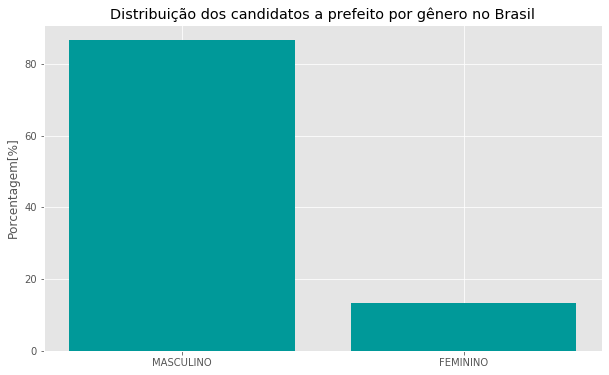

In [140]:
plt.figure(figsize=(10,6))
xx=base['GENERO'].unique()
yy=(base[u'GENERO'].value_counts()/len(base['GENERO'])*100)
plt.bar(xx,yy, color='#009999')
plt.title('Distribuição dos candidatos a prefeito por gênero no Brasil')
plt.ylabel('Porcentagem[%]')
plt.show();

In [139]:
base['GENERO'].unique()

array(['MASCULINO', 'FEMININO'], dtype=object)

# Como é a distribuição dos candidatos por Raça no país?
## Esta proporção é similar em todas as  Regiões do Brasil?

#### Como pode-se observar no resultado da tabela (linha 142 do código abaixo), os candidatos a prefeito em sua maioria é de COR branca em 65%, seguido por pardo 30%, preto 3,7%, indigina 0,2%.
#### O Rio Grande do Sul e o Nordeste apresentaram valores discrepantes quanto ao perfil médio dos candidatos a prefeito no país. No Rio Grande do Sul 93,6% são de COR branca, 4,9% parda e 1,1% preta. Já no Nordeste observa-se a uma maior diversificação, ou seja, 48,9% branco, 45,1% pardo e 4,8% preto e 0,2% indigena.
#### A Região Norte que apresentou maior número de candidatos de COR preta 5,3%, seguido pela Região Nordeste 4,8%.

## Quando analisamos na perspectiva de gênero, a distribuição dos candidatos por Raça sofre alguma alteração?
#### Não, permanece a mesma composição com, maioria de cor branca, em segundo lugar parda e em terceiro lugar preta. O gráfico gerado na célula 196.


In [101]:
RBR = base[u'COR_RACA'].value_counts()/len(base['COR_RACA'])*100
RSE = b_SE[u'COR_RACA'].value_counts()/len(b_SE['COR_RACA'])*100
RNE = b_NE[u'COR_RACA'].value_counts()/len(b_NE['COR_RACA'])*100
RCO = b_CO[u'COR_RACA'].value_counts()/len(b_CO['COR_RACA'])*100
RS = b_S[u'COR_RACA'].value_counts()/len(b_S['COR_RACA'])*100
RN = b_N[u'COR_RACA'].value_counts()/len(b_N['COR_RACA'])*100

RACAR = {"BR%": [RBR[0],RBR[1],RBR[2],RBR[5], RBR[3:4].sum()],
         "SE%": [RSE[0],RSE[1],RSE[2], RSE[5], RSE[3:4].sum()],
         "NE%": [RNE[0],RNE[1],RNE[2], RNE[5], RNE[3:4].sum()],
         "CO%": [RCO[0],RCO[1],RCO[2], RCO[5], RCO[3:4].sum()],
         "S%": [RS[0],RS[1],RS[2],RS[5], RS[3:4].sum()],
         "N%": [RN[0],RN[1],RN[2],RN[5], RN[3:4].sum()]}                

#Verifica qual a porcentagem dos perfils 
df_RACA = pd.DataFrame(data=RACAR)
df_RACA.rename(index={0:'BRANCA', 1:'PARDA', 2:'PRETA', 3:'INDIGENA',4:'OUTROS'}, inplace=True)
df_RACA.head()

,BR%,SE%,NE%,CO%,S%,N%
BRANCA,64.918268,76.274732,48.885502,60.957960,93.574538,56.735632
PARDA,30.384284,19.192888,45.141932,34.631289,4.879147,35.402299
PRETA,3.705191,3.730498,4.848543,3.204686,1.110944,5.287356
INDIGENA,0.192142,0.095877,0.200038,0.137836,0.045038,0.643678
OUTROS,0.513335,0.427090,0.571537,0.895934,0.300255,1.195402


In [102]:
base['COR_RACA'].unique()

array(['BRANCA', 'PARDA', 'AMARELA', 'PRETA', 'SEM INFORMAÇÃO',
       'INDÍGENA'], dtype=object)

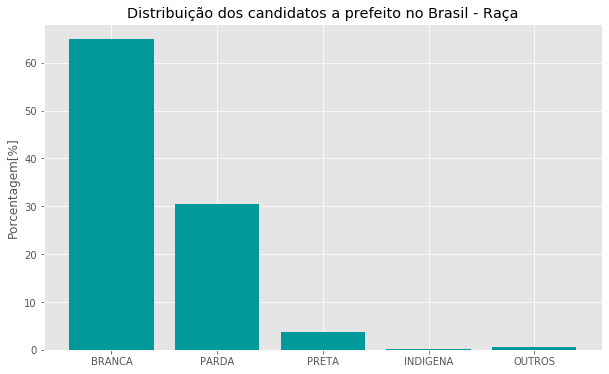

In [103]:
plt.figure(figsize=(10,6))

xx=df_RACA['BR%'].index[:]
yy=df_RACA['BR%']
plt.bar(xx,yy, color='#009999')
plt.title('Distribuição dos candidatos a prefeito no Brasil - Raça')
plt.ylabel('Porcentagem[%]')
plt.show();

In [104]:
RBR = base[u'COR_RACA'].value_counts()/len(base['COR_RACA'])*100
RSE = b_SE[u'COR_RACA'].value_counts()/len(b_SE['COR_RACA'])*100
RNE = b_NE[u'COR_RACA'].value_counts()/len(b_NE['COR_RACA'])*100
RCO = b_CO[u'COR_RACA'].value_counts()/len(b_CO['COR_RACA'])*100
RS = b_S[u'COR_RACA'].value_counts()/len(b_S['COR_RACA'])*100
RN = b_N[u'COR_RACA'].value_counts()/len(b_N['COR_RACA'])*100

RACAR = {"BR%": [RBR[0],RBR[1],RBR[2],RBR[5], RBR[3:4].sum()],
         "SE%": [RSE[0],RSE[1],RSE[2], RSE[5], RSE[3:4].sum()],
         "NE%": [RNE[0],RNE[1],RNE[2], RNE[5], RNE[3:4].sum()],
         "CO%": [RCO[0],RCO[1],RCO[2], RCO[5], RCO[3:4].sum()],
         "S%": [RS[0],RS[1],RS[2],RS[5], RS[3:4].sum()],
         "N%": [RN[0],RN[1],RN[2],RN[5], RN[3:4].sum()]}                

#Verifica qual a porcentagem dos perfils 
df_RACA = pd.DataFrame(data=RACAR)
df_RACA.rename(index={0:'BRANCA', 1:'PARDA', 2:'PRETA', 3:'INDIGENA',4:'OUTROS'}, inplace=True)
df_RACA.head()

,BR%,SE%,NE%,CO%,S%,N%
BRANCA,64.918268,76.274732,48.885502,60.957960,93.574538,56.735632
PARDA,30.384284,19.192888,45.141932,34.631289,4.879147,35.402299
PRETA,3.705191,3.730498,4.848543,3.204686,1.110944,5.287356
INDIGENA,0.192142,0.095877,0.200038,0.137836,0.045038,0.643678
OUTROS,0.513335,0.427090,0.571537,0.895934,0.300255,1.195402


In [105]:
GRBR = base.groupby('GENERO')[u'COR_RACA'].value_counts()/len(base['COR_RACA'])*100
GRSE = b_SE.groupby('GENERO')[u'COR_RACA'].value_counts()/len(b_SE['COR_RACA'])*100
GRNE = b_NE.groupby('GENERO')[u'COR_RACA'].value_counts()/len(b_NE['COR_RACA'])*100
GRCO = b_CO.groupby('GENERO')[u'COR_RACA'].value_counts()/len(b_CO['COR_RACA'])*100
GRS = b_S.groupby('GENERO')[u'COR_RACA'].value_counts()/len(b_S['COR_RACA'])*100
GRN = b_N.groupby('GENERO')[u'COR_RACA'].value_counts()/len(b_N['COR_RACA'])*100
            

#Verifica qual a porcentagem dos perfils FEMINININO
FEM_GRACAR = {"BR%":GRBR['FEMININO'][0:3],
          "SE%":GRSE['FEMININO'][0:3],
          "NE%":GRNE['FEMININO'][0:3],
          "CO":GRCO['FEMININO'][0:3],
          "S":GRS['FEMININO'][0:3],
          "N":GRN['FEMININO'][0:3],
         }

#Verifica qual a porcentagem dos perfils MASCULINO
MASC_GRACAR = {"BR%":GRBR['MASCULINO'][0:3],
          "SE%":GRSE['MASCULINO'][0:3],
          "NE%":GRNE['MASCULINO'][0:3],
          "CO":GRCO['MASCULINO'][0:3],
          "S":GRS['MASCULINO'][0:3],
          "N":GRN['MASCULINO'][0:3],
         }

df_FEM_GRACAR = pd.DataFrame(data=FEM_GRACAR)
df_MASC_GRACAR = pd.DataFrame(data=MASC_GRACAR)
df_FEM_GRACAR.head()

,BR%,SE%,NE%,CO,S,N
BRANCA,8.715228,8.759697,9.335111,8.063405,9.262873,5.425287
PARDA,3.948953,1.830384,7.239474,3.445899,0.420357,8.137931
PRETA,0.539145,0.644993,0.723947,0.310131,0.075064,0.827586


In [106]:
df_MASC_GRACAR.head()

,BR%,SE%,NE%,CO,S,N
BRANCA,56.203040,67.515035,35.806820,52.894555,84.311665,29.977011
PARDA,26.435331,17.362503,41.646028,31.185389,4.458790,48.597701
PRETA,3.166045,3.085505,4.124595,2.894555,1.035880,4.459770


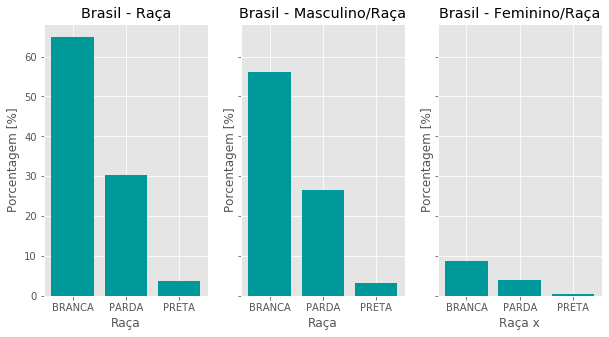

In [107]:
#fig, (ax1, ax2) = plt.subplot(1, 2, figsize=(10,5))
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10, 5), sharey=True)

xx=df_RACA['BR%'].index[:3]
xx1=df_MASC_GRACAR['BR%'].index[:]
yy1=df_RACA['BR%'][:3]
yy2=df_MASC_GRACAR['BR%']
yy3=df_FEM_GRACAR['BR%']
# Dados para cada subplot
ax1.bar(xx,yy1,color='#009999')
ax2.bar(xx1,yy2,color='#009999')
ax3.bar(xx1,yy3,color='#009999')

ax1.set(title="Brasil - Raça", xlabel="Raça", ylabel="Porcentagem [%]")
ax2.set(title="Brasil - Masculino/Raça", xlabel="Raça", ylabel="Porcentagem [%]")
ax3.set(title="Brasil - Feminino/Raça", xlabel="Raça x", ylabel="Porcentagem [%]")

plt.show()

# Qual o grau de instrução dos candidatos a prefeito no Brasil?

### Os 56% dos candidatos a prefeito no Brasil possuem nível superior completo e 25% possuem ensino médio completo.

# Esta proporção é similar em todas as  Regiões do Brasil?
### Ao analisar o comportamento regional, observa-se similaridade com a média Nacional. Entretanto, na Região SE os candidatos com nível superior completo apresentam uma porcentagem ligeiramente maior que a média do Brasil (57%); e a Região N com a menor concentração de candidatos de nível superior completo (50,3%)

# Quando analisamos na perspectiva de gênero, a distribuição dos candidatos por escolaridade sofre alguma alteração?
### Não, permanece a mesma a mesma proporção. O independente do sexo os candidatos possuem ensino superior completo e em segundo lugar ensino médio completo.


In [110]:
IBR = base[u'GRAU_INSTRUCAO'].value_counts()/len(base['GRAU_INSTRUCAO'])*100
ISE = b_SE[u'GRAU_INSTRUCAO'].value_counts()/len(b_SE['GRAU_INSTRUCAO'])*100
INE = b_NE[u'GRAU_INSTRUCAO'].value_counts()/len(b_NE['GRAU_INSTRUCAO'])*100
ICO = b_CO[u'GRAU_INSTRUCAO'].value_counts()/len(b_CO['GRAU_INSTRUCAO'])*100
IS = b_S[u'GRAU_INSTRUCAO'].value_counts()/len(b_S['GRAU_INSTRUCAO'])*100
IN = b_N[u'GRAU_INSTRUCAO'].value_counts()/len(b_N['GRAU_INSTRUCAO'])*100

INSTR = {"BR%": IBR[0:],
         "SE%": ISE[0:],
         "NE%": INE[0:],
         "CO%": ICO[0:],
         "S%": IS[0:],
         "N%": IN[0:]}                

#Verifica qual a porcentagem dos perfils 
df_INSTR = pd.DataFrame(data=INSTR)
df_INSTR.head(10)

,BR%,SE%,NE%,CO%,S%,N%
ENSINO FUNDAMENTAL COMPLETO,5.770003,5.613179,5.315298,5.513439,6.635640,6.114943
ENSINO FUNDAMENTAL INCOMPLETO,5.411529,5.656759,4.505620,5.375603,5.900015,5.977011
ENSINO MÉDIO COMPLETO,24.978492,22.627037,27.128977,27.119228,23.104639,28.505747
ENSINO MÉDIO INCOMPLETO,2.558073,2.501525,2.429034,3.376981,2.357003,2.804598
LÊ E ESCREVE,0.983654,0.636276,1.171652,1.033770,0.870740,1.425287
SUPERIOR COMPLETO,54.488099,57.038264,53.114879,52.549966,55.532202,50.298851
SUPERIOR INCOMPLETO,5.810152,5.926959,6.334540,5.031013,5.599760,4.873563


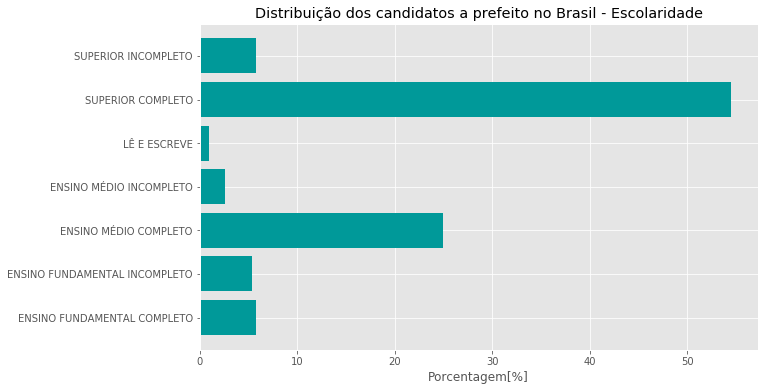

In [111]:
plt.figure(figsize=(10,6))

xx=df_INSTR['BR%'].index[:]
yy=df_INSTR['BR%']
plt.barh(xx,yy, color='#009999')
#plt.xticks(rotation=45)
plt.title('Distribuição dos candidatos a prefeito no Brasil - Escolaridade')
plt.xlabel('Porcentagem[%]')


plt.show();

In [112]:
GIBR = base.groupby('GENERO')[u'GRAU_INSTRUCAO'].value_counts()/len(base['GRAU_INSTRUCAO'])*100
GISE = b_SE.groupby('GENERO')[u'GRAU_INSTRUCAO'].value_counts()/len(b_SE['GRAU_INSTRUCAO'])*100
GINE = b_NE.groupby('GENERO')[u'GRAU_INSTRUCAO'].value_counts()/len(b_NE['GRAU_INSTRUCAO'])*100
GICO = b_CO.groupby('GENERO')[u'GRAU_INSTRUCAO'].value_counts()/len(b_CO['GRAU_INSTRUCAO'])*100
GIS = b_S.groupby('GENERO')[u'GRAU_INSTRUCAO'].value_counts()/len(b_S['GRAU_INSTRUCAO'])*100
GIN = b_N.groupby('GENERO')[u'GRAU_INSTRUCAO'].value_counts()/len(b_N['GRAU_INSTRUCAO'])*100
            

#Verifica qual a porcentagem dos perfils FEMINININO
FEM_GIR = {"BR%":GIBR['FEMININO'][0:],
          "SE%":GISE['FEMININO'][0:],
          "NE%":GINE['FEMININO'][0:],
          "CO":GICO['FEMININO'][0:],
          "S":GIS['FEMININO'][0:],
          "N":GIN['FEMININO'][0:],
         }

#Verifica qual a porcentagem dos perfils MASCULINO
MASC_GIR = {"BR%":GIBR['MASCULINO'][0:],
          "SE%":GISE['MASCULINO'][0:],
          "NE%":GINE['MASCULINO'][0:],
          "CO":GICO['MASCULINO'][0:],
          "S":GIS['MASCULINO'][0:],
          "N":GIN['MASCULINO'][0:],
         }

df_FEM_GIR = pd.DataFrame(data=FEM_GIR)
df_MASC_GIR = pd.DataFrame(data=MASC_GIR)
df_FEM_GIR.head(10)

,BR%,SE%,NE%,CO,S,N
ENSINO FUNDAMENTAL COMPLETO,0.252366,0.200471,0.361974,0.137836,0.180153,0.459770
ENSINO FUNDAMENTAL INCOMPLETO,0.192142,0.148174,0.285769,0.137836,0.075064,0.367816
ENSINO MÉDIO COMPLETO,2.188127,1.429443,3.362545,2.170917,1.291097,2.620690
ENSINO MÉDIO INCOMPLETO,0.140522,0.078445,0.190512,0.206754,0.090077,0.275862
LÊ E ESCREVE,0.048753,0.008716,0.076205,0.103377,0.030026,0.045977
SUPERIOR COMPLETO,9.911098,8.907871,12.335683,8.718125,7.761597,10.574713
SUPERIOR INCOMPLETO,0.610840,0.531683,0.895409,0.447967,0.405345,0.367816


In [113]:
df_MASC_GIR.head(10)

,BR%,SE%,NE%,CO,S,N
ENSINO FUNDAMENTAL COMPLETO,5.517637,5.412708,4.953324,5.375603,6.455487,5.655172
ENSINO FUNDAMENTAL INCOMPLETO,5.219386,5.508585,4.219851,5.237767,5.824951,5.609195
ENSINO MÉDIO COMPLETO,22.790364,21.197594,23.766432,24.948312,21.813542,25.885057
ENSINO MÉDIO INCOMPLETO,2.417551,2.423080,2.238522,3.170227,2.266927,2.528736
LÊ E ESCREVE,0.934901,0.627560,1.095447,0.930393,0.840715,1.379310
SUPERIOR COMPLETO,44.577000,48.130393,40.779196,43.831840,47.770605,39.724138
SUPERIOR INCOMPLETO,5.199312,5.395276,5.439131,4.583046,5.194415,4.505747


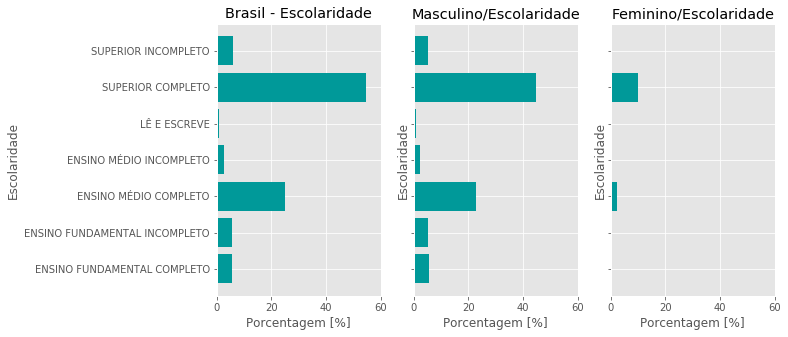

In [114]:
#fig, (ax1, ax2) = plt.subplot(1, 2, figsize=(10,5))
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10, 5), sharey=True)

xx=df_INSTR['BR%'].index[0:]
yy=df_INSTR['BR%']
yy2=df_MASC_GIR['BR%']
yy3=df_FEM_GIR['BR%']

ax1.barh(xx,yy,color='#009999')
plt.xlim(0,60)
ax2.barh(xx,yy2,color='#009999')
ax3.barh(xx,yy3,color='#009999')
ax1.set_xlim([0, 60])
ax2.set_xlim([0, 60])
ax3.set_xlim([0, 60])
ax1.set(title="Brasil - Escolaridade", xlabel="Porcentagem [%]", ylabel="Escolaridade")
ax2.set(title="Masculino/Escolaridade", xlabel="Porcentagem [%]", ylabel="Escolaridade")
ax3.set(title="Feminino/Escolaridade", xlabel="Porcentagem [%]", ylabel="Escolaridade")
#plt.xlim(0,60)
plt.show()

##### Qual a faixa etária dos candidatos a prefeito no Brasil?

### A faixa etária com maior concentração de candidatos a prefeito no Brasil é 40-49anos (38%), seguido em segundo lugar por 50-59 anos (33%).  

# Existe alguma diferença quando regionalizamos a análise?
### O comportamento é similar em quase todas as regiões, apresentando pequenas variações entre essas três classes. Na Região Sul as classes mais significativas estão entre 50 e 59 anos, indicando candidatos ligeiramente mais velhos que as demais Regiões.


# E com relação ao gênero existe alguma diferença na faixa etária?
### Não foi observada diferença quando analisada a faixa etária por gênero.

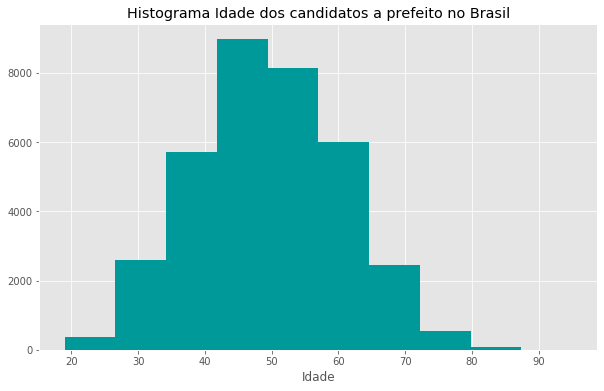

In [115]:
plt.figure(figsize=(10,6))
plt.hist(base['IDADE'], bins=10,color='#009999')
plt.title('Histograma Idade dos candidatos a prefeito no Brasil');
plt.xlabel('Idade');

In [116]:
FEBR = base[u'FAIXA_ETARIA'].value_counts()/len(base['FAIXA_ETARIA'])*100
FESE = b_SE[u'FAIXA_ETARIA'].value_counts()/len(b_SE['FAIXA_ETARIA'])*100
FENE = b_NE[u'FAIXA_ETARIA'].value_counts()/len(b_NE['FAIXA_ETARIA'])*100
FECO = b_CO[u'FAIXA_ETARIA'].value_counts()/len(b_CO['FAIXA_ETARIA'])*100
FES = b_S[u'FAIXA_ETARIA'].value_counts()/len(b_S['FAIXA_ETARIA'])*100
FEN = b_N[u'FAIXA_ETARIA'].value_counts()/len(b_N['FAIXA_ETARIA'])*100

FE = {"BR%": FEBR[0:],
         "SE%": FESE[0:],
         "NE%": FENE[0:],
         "CO%": FECO[0:],
         "S%": FES[0:],
         "N%": FEN[0:]}                

#Verifica qual a porcentagem dos perfils 
df_FE = pd.DataFrame(data=FE)
df_FE.head(20)

,BR%,SE%,NE%,CO%,S%,N%
30 – 39 ANOS,16.937195,15.113745,20.508668,16.195727,14.051944,18.850575
40 – 49 ANOS,30.989389,29.774253,31.625071,33.184011,28.899565,35.080460
50 – 59 ANOS,31.106969,31.517476,27.767194,31.805651,35.730371,30.712644
60 OU SUPERIOR,18.333811,21.467794,16.241189,16.678153,19.321423,13.011494
ATÉ 29 ANOS,2.632636,2.126732,3.857878,2.136458,1.996697,2.344828


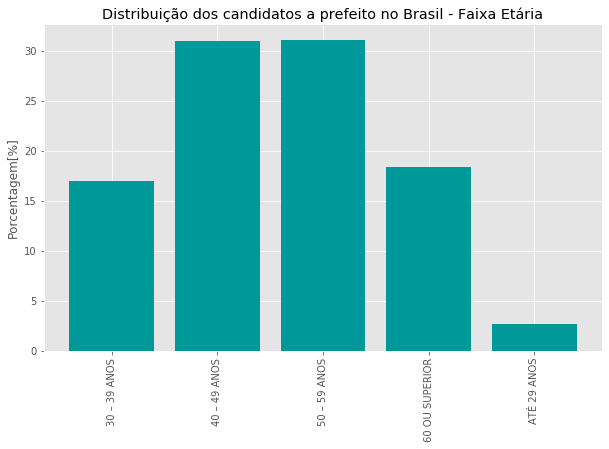

In [117]:
plt.figure(figsize=(10,6))

xx=df_FE['BR%'].index[:]
yy=df_FE['BR%']
plt.bar(xx,yy, color='#009999')
plt.xticks(rotation=90)
plt.title('Distribuição dos candidatos a prefeito no Brasil - Faixa Etária')
plt.ylabel('Porcentagem[%]')


plt.show();

In [142]:
base['IDADE'].describe()

count    34870.000000
mean        49.452022
std         10.911060
min         19.000000
25%         42.000000
50%         49.000000
75%         57.000000
max         95.000000
Name: IDADE, dtype: float64

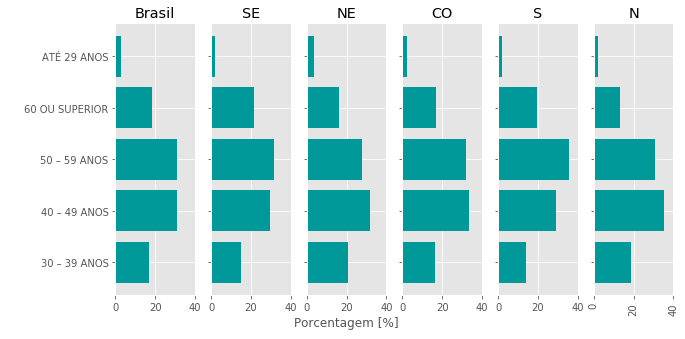

In [143]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,6, figsize=(10, 5), sharex=True, sharey=True)

xx=df_FE['BR%'].index[0:]
yy=df_FE['BR%']
yy2=df_FE['SE%']
yy3=df_FE['NE%']
yy4=df_FE['CO%']
yy5=df_FE['S%']
yy6=df_FE['N%']

ax1.barh(xx,yy,color='#009999')
ax2.barh(xx,yy2,color='#009999')
ax3.barh(xx,yy3,color='#009999')
ax4.barh(xx,yy4,color='#009999')
ax5.barh(xx,yy5,color='#009999')
ax6.barh(xx,yy6,color='#009999')
ax1.set_xlim([0, 40])


ax1.set(title="Brasil", xlabel="", ylabel=" ")
ax2.set(title="SE", xlabel=" ", ylabel=" ")
ax3.set(title="NE", xlabel="Porcentagem [%]", ylabel=" ")
ax4.set(title="CO", xlabel=" ", ylabel=" ")
ax5.set(title="S", xlabel=" ", ylabel=" ")
ax6.set(title="N", xlabel=" ", ylabel=" ")
plt.xticks(rotation=90)
#plt.xlim(0,60)
plt.show()

In [144]:
GFEBR = base.groupby('GENERO')[u'FAIXA_ETARIA'].value_counts()/len(base['FAIXA_ETARIA'])*100
GFESE = b_SE.groupby('GENERO')[u'FAIXA_ETARIA'].value_counts()/len(b_SE['FAIXA_ETARIA'])*100
GFENE = b_NE.groupby('GENERO')[u'FAIXA_ETARIA'].value_counts()/len(b_NE['FAIXA_ETARIA'])*100
GFECO = b_CO.groupby('GENERO')[u'FAIXA_ETARIA'].value_counts()/len(b_CO['FAIXA_ETARIA'])*100
GFES = b_S.groupby('GENERO')[u'FAIXA_ETARIA'].value_counts()/len(b_S['FAIXA_ETARIA'])*100
GFEN = b_N.groupby('GENERO')[u'FAIXA_ETARIA'].value_counts()/len(b_N['FAIXA_ETARIA'])*100
            

#Verifica qual a porcentagem dos perfils FEMINININO
FEM_GFER = {"BR%":GFEBR['FEMININO'][0:],
          "SE%":GFESE['FEMININO'][0:],
          "NE%":GFENE['FEMININO'][0:],
          "CO":GFECO['FEMININO'][0:],
          "S":GFES['FEMININO'][0:],
          "N":GFEN['FEMININO'][0:],
         }

#Verifica qual a porcentagem dos perfils MASCULINO
MASC_GFER = {"BR%":GFEBR['MASCULINO'][0:],
          "SE%":GFESE['MASCULINO'][0:],
          "NE%":GFENE['MASCULINO'][0:],
          "CO":GFECO['MASCULINO'][0:],
          "S":GFES['MASCULINO'][0:],
          "N":GFEN['MASCULINO'][0:],
         }

df_FEM_GFER = pd.DataFrame(data=FEM_GFER)
df_MASC_GFER = pd.DataFrame(data=MASC_GFER)
df_FEM_GFER.head(15)

,BR%,SE%,NE%,CO,S,N
30 – 39 ANOS,2.360195,1.664778,3.562583,2.136458,1.456238,2.482759
40 – 49 ANOS,4.470892,3.625904,5.734426,4.962095,3.167693,5.379310
50 – 59 ANOS,4.204187,3.765362,5.058106,3.583735,3.497973,5.057471
60 OU SUPERIOR,1.921422,1.961126,2.524290,1.137147,1.426212,1.379310
ATÉ 29 ANOS,0.387152,0.287632,0.628691,0.103377,0.285242,0.413793


In [145]:
df_MASC_GFER.head(15)

,BR%,SE%,NE%,CO,S,N
30 – 39 ANOS,14.577000,13.448967,16.946085,14.059269,12.595706,16.367816
40 – 49 ANOS,26.518497,26.148348,25.890646,28.221916,25.731872,29.701149
50 – 59 ANOS,26.902782,27.752114,22.709087,28.221916,32.232398,25.655172
60 OU SUPERIOR,16.412389,19.506668,13.716898,15.541006,17.895211,11.632184
ATÉ 29 ANOS,2.245483,1.839100,3.229187,2.033081,1.711455,1.931034


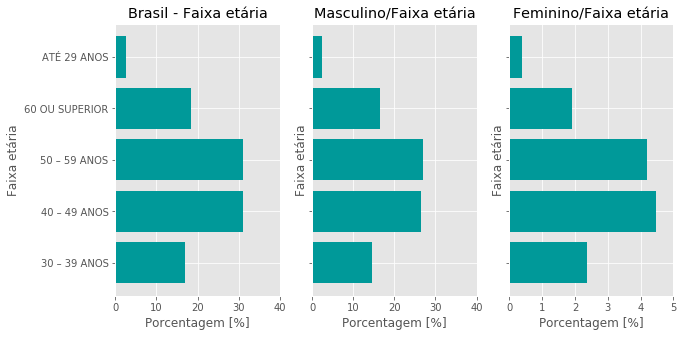

In [146]:
#fig, (ax1, ax2) = plt.subplot(1, 2, figsize=(10,5))
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10, 5), sharey=True)
xx=df_FE['BR%'].index[0:]
yy=df_FE['BR%']
yy2=df_MASC_GFER['BR%']
yy3=df_FEM_GFER['BR%']

ax1.barh(xx,yy,color='#009999')
plt.xlim(0,60)
ax2.barh(xx,yy2,color='#009999')
ax3.barh(xx,yy3,color='#009999')
ax1.set_xlim([0, 40])
ax2.set_xlim([0, 40])
ax3.set_xlim([0, 5])
ax1.set(title="Brasil - Faixa etária", xlabel="Porcentagem [%]", ylabel="Faixa etária")
ax2.set(title="Masculino/Faixa etária", xlabel="Porcentagem [%]", ylabel="Faixa etária")
ax3.set(title="Feminino/Faixa etária", xlabel="Porcentagem [%]", ylabel="Faixa etária")
#plt.xlim(0,60)
plt.show()

# Como está distribuído os candidatos a prefeito com relação ao estado civil?
### A classe casado apresentou mais de 70% dos candidatos, depois a classe solteiro com 18% e divorciado com 9%.

In [150]:
base['ESTADO_CIVIL'].unique()

array(['DIVORCIADO(A)', 'CASADO(A)', 'SOLTEIRO(A)', 'VIÚVO(A)',
       'SEPARADO(A) JUDICIALMENTE'], dtype=object)

In [151]:
base[u'ESTADO_CIVIL'].value_counts()/len(base['ESTADO_CIVIL'])*100

CASADO(A)                    69.807858
SOLTEIRO(A)                  18.442787
DIVORCIADO(A)                 8.741038
VIÚVO(A)                      1.657585
SEPARADO(A) JUDICIALMENTE     1.350731
Name: ESTADO_CIVIL, dtype: float64

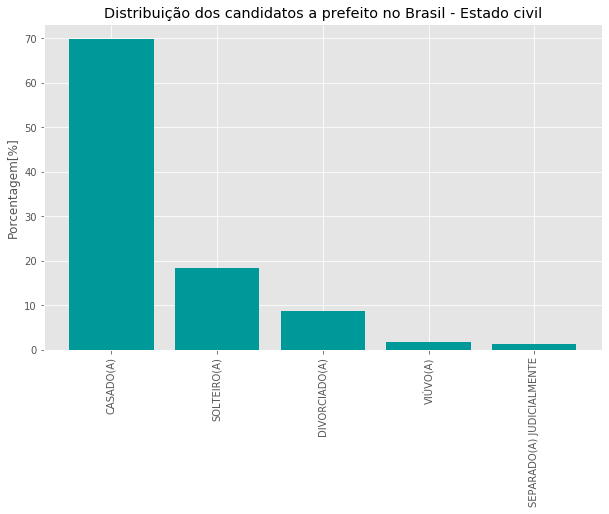

In [152]:
plt.figure(figsize=(10,6))

xx=['CASADO(A)','SOLTEIRO(A)','DIVORCIADO(A)','VIÚVO(A)','SEPARADO(A) JUDICIALMENTE']
yy=base[u'ESTADO_CIVIL'].value_counts()/len(base['ESTADO_CIVIL'])*100
plt.bar(xx,yy, color='#009999')
plt.xticks(rotation=90)
plt.title('Distribuição dos candidatos a prefeito no Brasil - Estado civil')
plt.ylabel('Porcentagem[%]')


plt.show();

# Algoritmos de classificação

## Para dar andamento a essa etapa foi necessário transformar as reduzir as dimenções  dos atributos abaixo:

#### - Grau de instrução passou de 7 para 4,  foram agregados ===> Fundamental incomp. = Fundamental Inc. + Lê e Escreve; Fundamental = Fundamental completo + Médio incompleto; Médio = Médio completo + Superior Incompleto; Superior completo.

#### - Estado civil passou de 5 para 3 ===> Divórciado = Divórciado + Separado Judicialmente; Solteiro = Solteiro + Viúvo; Casado.

#### - Raça passou de 6 para 4 ===> Branca; Parda; Preta; Outros = Amarelo + Indígena + sem informação.

#### - Idade/Faixa etária passou de 12 para 5 com base nos dados e na aálise da faixa etária do IBGE, foi realizada uma nova classificação: abaixo de 30 anos; 30 - 39 anos; 40 - 49 anos; 50 - 59 anos; superior a 60 anos.

### Finalmente foi gerado o dataset tratado para ser aplicado aos algoritmos de classificação - machine learning

In [153]:
#"Criando uma nova coluna, com a nova categorização de Grau de instrução"
base['GRAU_INSTRUCAO2'] = 'NaN'
base.loc[base.GRAU_INSTRUCAO=='SUPERIOR COMPLETO','GRAU_INSTRUCAO2']='SUPERIOR'
base.loc[base.GRAU_INSTRUCAO=='SUPERIOR INCOMPLETO','GRAU_INSTRUCAO2']='MÉDIO'
base.loc[base.GRAU_INSTRUCAO=='ENSINO MÉDIO COMPLETO','GRAU_INSTRUCAO2']='MÉDIO'
base.loc[base.GRAU_INSTRUCAO=='ENSINO FUNDAMENTAL COMPLETO','GRAU_INSTRUCAO2']='FUNDAMENTAL'
base.loc[base.GRAU_INSTRUCAO=='ENSINO MÉDIO INCOMPLETO','GRAU_INSTRUCAO2']='FUNDAMENTAL'
base.loc[base.GRAU_INSTRUCAO=='ENSINO FUNDAMENTAL INCOMPLETO','GRAU_INSTRUCAO2']='LÊ E ESCREVE'
base.loc[base.GRAU_INSTRUCAO=='LÊ E ESCREVE','GRAU_INSTRUCAO2']='LÊ E ESCREVE'

In [154]:
#"Criando uma nova coluna, com a nova categorização de Grau de instrução"
base['ESTADO_CIVIL2'] = base['ESTADO_CIVIL']
base.loc[base.ESTADO_CIVIL=='VIÚVO(A)','ESTADO_CIVIL2']='SOLTEIRO(A)'
base.loc[base.ESTADO_CIVIL=='SEPARADO(A) JUDICIALMENTE','ESTADO_CIVIL2']='DIVORCIADO(A)'

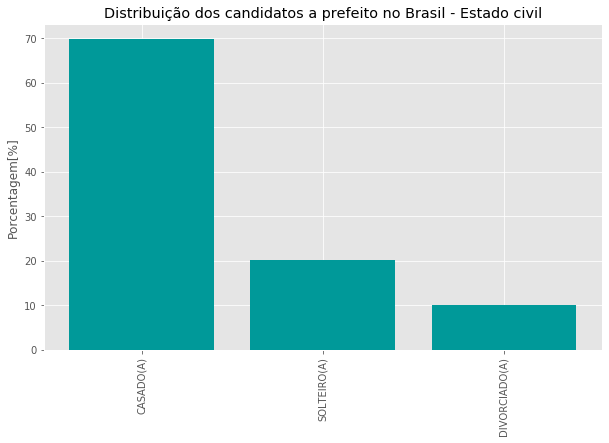

In [155]:
plt.figure(figsize=(10,6))

xx=['CASADO(A)','SOLTEIRO(A)','DIVORCIADO(A)']
yy=base[u'ESTADO_CIVIL2'].value_counts()/len(base['ESTADO_CIVIL2'])*100
#yy=base[u'ESTADO_CIVIL2'].value_counts()
plt.bar(xx,yy, color='#009999')
plt.xticks(rotation=90)
plt.title('Distribuição dos candidatos a prefeito no Brasil - Estado civil')
plt.ylabel('Porcentagem[%]')
plt.show();

In [156]:
base[u'ESTADO_CIVIL2'].describe()

count         34870
unique            3
top       CASADO(A)
freq          24342
Name: ESTADO_CIVIL2, dtype: object

##       Geração arquivo com os principais features para a etapa de modelagem

#### Criação de um arquivo com os features de input do modelo de machine learning (gênero, faixa etária, raça, estado civil, graus de instrução e faixa etária, situação final).


In [157]:
#"Criando uma nova coluna, com a nova categorização de Grau de instrução"
base['COR_RACA2'] = base['COR_RACA']
base.loc[base.COR_RACA=='INDÍGENA','COR_RACA2']='OUTRO'
base.loc[base.COR_RACA=='AMARELA','COR_RACA2']='OUTRO'
base.loc[base.COR_RACA=='SEM INFORMAÇÃO','COR_RACA2']='OUTRO'

In [158]:
base['COR_RACA2'].describe()

count      34870
unique         4
top       BRANCA
freq       22637
Name: COR_RACA2, dtype: object

In [159]:
#Criando um novo  Data_frame com os features principais
basetree=pd.DataFrame(base,columns=['ANO_ELEICAO','GENERO','GRAU_INSTRUCAO2','ESTADO_CIVIL2','COR_RACA2','FAIXA_ETARIA','SITUACAO_FINAL'])

# Exportando os databases
basetree.to_csv (r'base_treeBR.csv', index = False, header=True)